# **PROJECT : Wine Quality Prediction**

**Import required libraries**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/content/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [127]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [128]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [129]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Checking missing values**

In [130]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Statistical measures of the dataset**

In [131]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Display Correlation of the data**

In [132]:
corr=df.corr()

<Axes: >

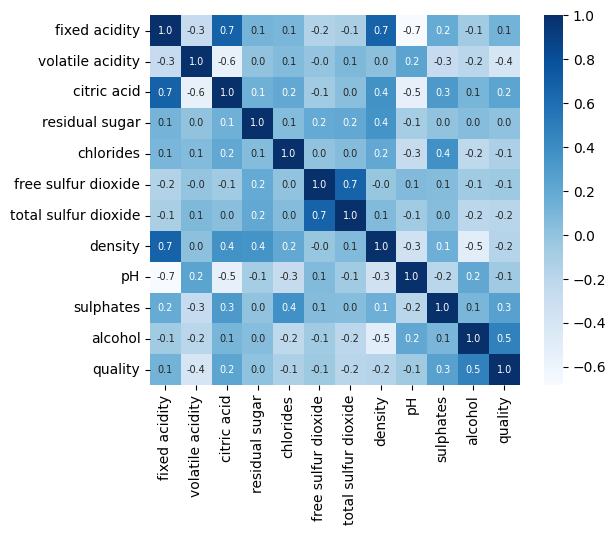

In [133]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Blues')

**Values of Wine Quality**

<Axes: xlabel='quality', ylabel='count'>

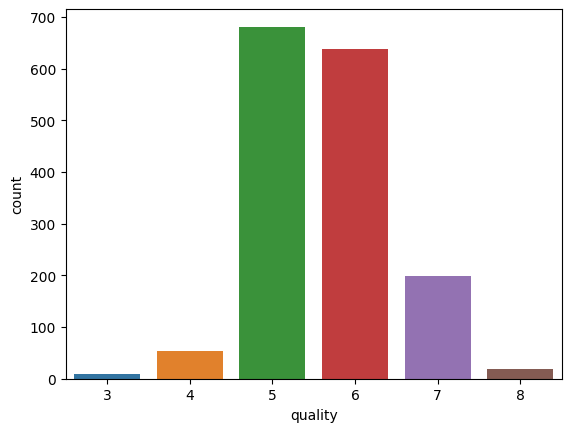

In [134]:
sns.countplot(x='quality',data=df)

**Volatile acidity VS Quality**

<Axes: xlabel='quality', ylabel='volatile acidity'>

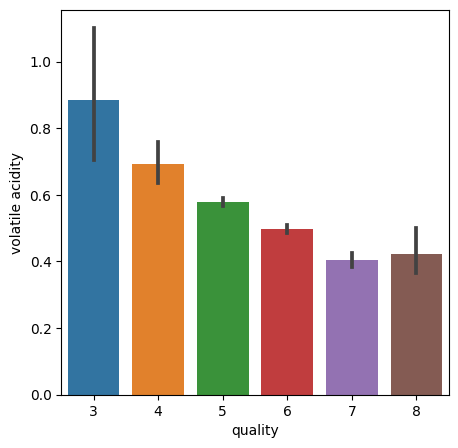

In [135]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

**Citric acid VS Quality**

<Axes: xlabel='quality', ylabel='citric acid'>

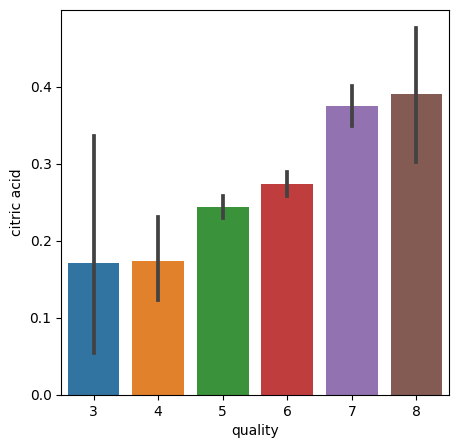

In [136]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)

**Separating the Input features and target**

In [137]:
x=df.iloc[:,:-1].values
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [138]:
y=df.iloc[:,-1].values
y

array([5, 5, 5, ..., 6, 5, 6])

**Training & Testing data**

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 8.6 ,  0.22,  0.36, ...,  3.47,  0.87, 11.  ],
       [12.5 ,  0.46,  0.63, ...,  2.99,  0.87, 10.2 ],
       [ 7.2 ,  0.54,  0.27, ...,  3.39,  0.71, 11.  ],
       ...,
       [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
       [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
       [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]])

In [140]:
x_test
y_train
y_test

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [141]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_test=scaler.transform(x_test)
x_train=scaler.transform(x_train)'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nscaler.fit(x_train)\nx_test=scaler.transform(x_test)\nx_train=scaler.transform(x_train)'

**Model creation using**
- SVM
- LinearRegression
- RandomForestRegressor
- XGBRegressor

**SVM**

**Hyperparameter tuning**

In [142]:
from sklearn.svm import SVC
s_model=SVC()

In [143]:
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(s_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 100, 'gamma': 0.1}


**Model creation**

In [144]:
s_model1=SVC(C=100,gamma=0.1)
s_model1.fit(x_train,y_train)
y_pred=s_model1.predict(x_test)
y_pred

array([5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 7, 6, 6, 7, 5, 5, 6,
       7, 7, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5,
       8, 5, 5, 6, 8, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 5, 4, 7, 5, 5, 6, 6, 6, 5, 7, 6, 6,
       5, 7, 6, 5, 6, 6, 7, 6, 7, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 4, 6, 6, 5, 5,
       6, 6, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 7, 6, 6, 6, 5, 7, 6, 5, 5, 6,
       3, 7, 5, 5, 5, 6, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 7, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 4, 6, 5, 7, 5, 6, 6, 5, 6, 5,
       6, 7, 6, 7, 6, 5, 7, 5, 6, 5, 5, 6, 3, 6, 5, 5, 8, 6, 6, 6, 6, 7,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5, 6, 7, 6, 5, 5, 5, 7,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5,

In [145]:
y_test

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [146]:
print(s_model1.predict([[7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4]]))

[5]


**Distribution of Quality**

In [147]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**LinearRegression**

**Hyperparameter tuning**

In [148]:
from sklearn.linear_model import LinearRegression
lg_model=LinearRegression()
lg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
parameter={'copy_X':[True,False],'fit_intercept':[True,False],'n_jobs':[None,1,5,7,6],'positive':[True,False]}
gsv=GridSearchCV(lg_model,parameter,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}


**Model creation**

In [164]:
lg_model1=LinearRegression(positive=True)
lg_model1.fit(x_train,y_train)
y_pred=lg_model1.predict(x_test)
y_pred

array([5.26806113, 5.11696486, 5.73536165, 5.32257754, 5.59247199,
       5.12633653, 5.29219603, 5.246815  , 5.4852739 , 5.6923338 ,
       6.26518231, 5.33022293, 5.26203655, 5.06324764, 5.21267214,
       6.27321455, 5.32647743, 5.53527603, 6.38179344, 5.41711217,
       5.50721705, 5.03223069, 6.01933641, 6.34993366, 5.26994839,
       5.29886454, 6.36580176, 5.44478993, 5.29905511, 5.88878107,
       5.26024212, 5.27554414, 5.3827738 , 5.40445636, 5.37217715,
       5.03249352, 6.04783285, 5.66822409, 5.72225598, 5.90565652,
       5.57294322, 5.12410732, 5.81604969, 5.36533506, 5.70350002,
       5.81653373, 6.13826887, 5.33944522, 5.59420128, 5.48707817,
       5.53777602, 5.57020112, 5.69639665, 6.58356471, 5.10227499,
       5.1150861 , 5.97603296, 5.55997652, 5.66582183, 5.33591427,
       5.35532762, 5.7448212 , 5.08391084, 5.14676372, 6.31161414,
       5.16852924, 6.23640933, 5.38469636, 6.29599197, 5.30166082,
       6.33184935, 5.12184631, 5.39966057, 5.71099803, 6.14496

**Find errors**

In [165]:
df2=pd.DataFrame({'act_value':y_test,'pred_value':y_pred,'diff':y_test-y_pred})
df2

,act_value,pred_value,diff
0,6,5.268061,0.731939
1,5,5.116965,-0.116965
2,6,5.735362,0.264638
3,5,5.322578,-0.322578
4,6,5.592472,0.407528
...,...,...,...
475,7,5.449840,1.550160
476,8,5.949182,2.050818
477,6,5.592472,0.407528
478,7,6.265182,0.734818


**Performance Evaluation(errors)**

In [153]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))

MAPE 0.09240658134560756


In [154]:
from sklearn.metrics import r2_score
print('R2 SCORE',r2_score(y_test,y_pred))

R2 SCORE 0.35138853325052266


**RandomForestRegressor**

In [155]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=100,random_state=40)
rfg.fit(x_train,y_train)
y_pred2=rfg.predict(x_test)
y_pred2

array([5.26, 5.17, 5.37, 5.18, 6.  , 5.02, 5.07, 5.05, 6.  , 6.  , 6.37,
       5.4 , 5.83, 5.27, 5.49, 6.4 , 5.39, 5.67, 6.86, 5.08, 5.  , 5.83,
       5.52, 6.1 , 5.52, 5.96, 6.55, 5.26, 5.17, 5.98, 5.26, 5.41, 5.82,
       5.42, 5.51, 5.07, 6.3 , 6.1 , 5.47, 6.23, 4.91, 5.14, 6.18, 5.06,
       5.54, 5.76, 6.44, 5.58, 5.05, 5.59, 5.07, 5.28, 5.46, 7.06, 5.23,
       5.18, 6.04, 5.97, 5.53, 5.02, 5.7 , 6.13, 5.55, 5.25, 6.9 , 5.38,
       6.71, 5.68, 6.68, 5.45, 6.15, 5.28, 5.78, 5.56, 6.13, 5.06, 6.68,
       5.3 , 6.  , 6.58, 5.12, 6.88, 5.07, 5.7 , 5.76, 6.64, 5.01, 6.08,
       6.44, 5.52, 6.58, 5.61, 5.25, 5.15, 5.28, 5.36, 5.15, 5.84, 4.67,
       5.56, 4.96, 5.07, 5.85, 5.95, 5.27, 6.6 , 5.84, 5.18, 5.35, 5.17,
       6.44, 5.06, 6.46, 5.05, 5.19, 5.88, 5.48, 5.28, 5.09, 5.71, 6.24,
       5.74, 5.76, 5.39, 5.74, 5.26, 6.4 , 5.42, 5.26, 5.52, 5.78, 5.32,
       5.04, 6.49, 5.59, 5.1 , 4.91, 5.53, 5.31, 5.87, 6.55, 6.33, 6.61,
       5.26, 5.46, 5.05, 5.66, 5.73, 5.76, 5.08, 5.

**Performance Evaluation(errors)**

In [156]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred2))

MAPE 0.08017172619047619


In [157]:
from sklearn.metrics import r2_score
print('R2 SCORE',r2_score(y_test,y_pred2))

R2 SCORE 0.45280151151089476


**XGBRegressor**

**Hyperparameter tuning**

In [158]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [159]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 200]}


In [160]:
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


**Model creation**

In [161]:
xgb1=XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)
xgb1.fit(x_train,y_train)
y_pred3=xgb1.predict(x_test)
y_pred3

array([5.3957734, 5.129382 , 5.1092186, 5.383278 , 5.8180203, 5.1858377,
       5.1570363, 5.3218293, 6.006467 , 5.872527 , 6.3334737, 5.482903 ,
       5.7272596, 5.168003 , 5.3571115, 7.072666 , 5.415115 , 5.5525045,
       6.8624935, 5.1914186, 4.867843 , 5.7473173, 5.6833277, 6.330354 ,
       5.5355606, 5.9942837, 6.383912 , 5.3201184, 5.3284526, 5.9594073,
       5.4231696, 5.3134723, 5.974061 , 5.7270308, 5.5360007, 5.111612 ,
       6.3317995, 5.977533 , 5.4651403, 6.187911 , 5.134734 , 5.446181 ,
       6.22201  , 5.287684 , 5.8421555, 5.726469 , 6.1713085, 5.4680533,
       5.014973 , 5.6520205, 5.0565667, 5.2292776, 5.633008 , 6.5394726,
       4.985762 , 4.9288397, 6.0787063, 6.15708  , 5.4341793, 5.1549497,
       5.762674 , 6.388469 , 5.255733 , 5.121176 , 6.936694 , 5.0987415,
       6.7818875, 5.6022043, 6.623638 , 5.4228306, 6.2427297, 5.23528  ,
       5.673993 , 5.6885743, 6.005816 , 4.962911 , 6.7712536, 5.2822046,
       5.4597087, 6.417969 , 5.0959253, 6.898892 , 

**Performance Evaluation(errors)**

In [162]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred3))

MAPE 0.08577073524277361


In [163]:
from sklearn.metrics import r2_score
print('R2 SCORE',r2_score(y_test,y_pred3))

R2 SCORE 0.4057738023494444
